In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

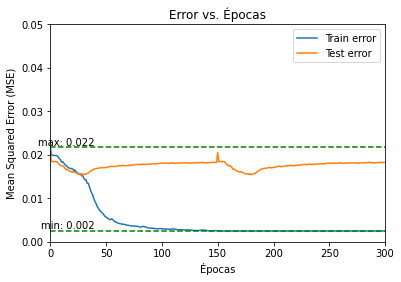

In [40]:
def plot_train_and_test_error(train_error_txt, test_error_txt):
    train_error = [float(line) for line in open(train_error_txt).readlines()]
    test_error = [float(line) for line in open(test_error_txt).readlines()]
    
    max_error = max(train_error + test_error)
    min_error = min(train_error + test_error)

    train_epochs = len(train_error)
    test_epochs = len(test_error)

    if(test_epochs < train_epochs):
        max_test_error = max(test_error)
        for i in range(test_epochs, train_epochs):
            test_error.append(max_test_error)
    elif(test_epochs > train_epochs):
        min_train_error = min(train_error)
        for i in range(train_epochs, test_epochs):
            train_error.append(min_train_error)

    max_epochs = max(train_epochs, test_epochs)

    fig, ax = plt.subplots()
    ax.plot(train_error, label="Train error")
    ax.plot(test_error, label="Test error")
    ax.legend()
    ax.set_title("Error vs. Épocas")
    ax.set_xlabel("Épocas")
    ax.set_ylabel("Mean Squared Error (MSE)")
    plt.hlines(y=max_error,xmin=0,xmax=max_epochs,color="green", linestyle='--')
    plt.text(40, max_error, f"max: {round(max_error, 3)}", ha='right', va='bottom')
    plt.hlines(y= min_error,xmin=0,xmax=max_epochs,color="green", label='min error', linestyle='--')
    plt.text(40, min_error, f"min: {round(min_error, 3)}", ha='right', va='bottom')
    plt.xlim(0, max_epochs), plt.ylim(0, 0.05)
    plt.show()

plot_train_and_test_error("models/mariposas_256_arch1/train_loss.txt", "models/mariposas_256_arch1/test_loss.txt")